In [ ]:
"""
This section is a material informatics project aiming to build a quantitative composition-structure-property (QSPR) relationship between palladium-based alloys membranes and their hydrogen permeability.
...
"""

'\nThis section is a material informatics project aiming to build a quantitative composition-structure-property (QSPR) relationship between palladium-based alloys membranes and their hydrogen permeability.\n...\n'

In [ ]:
# Utilities to visualize periodic table and Element Counts in a material Informatics database
!pip install pymatgen matminer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 45.8 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=43

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=05307b7c574c7c28aa75dcfafe1753ad0f86598cccf115899cd2ec76c1fa3da5
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
# Import useful packages and dependencies
import os
import pandas as pd
import numpy as np
import scipy as sc
import re
from ydata_profiling import ProfileReport
from sklearn.model_selection import StratifiedGroupKFold, GroupKFold
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format='retina' #Allow image to have high resolution
np.random.seed(42) # Ensure reproducibility

In [ ]:
from pymatgen.core import Element, Composition
from matminer.featurizers.composition import ElementFraction
from matminer.featurizers.conversions import StrToComposition

In [ ]:
# Mounting google drive to import and export file from and to it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setting this options allow Pandas to display every columns. By default only few are displayed.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
%%time
# Repo for Figures
Figure_dir='/content/drive/MyDrive/PhD_Pd alloy prediction/Figures_Pd_Permeability_Prediction'

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs


In [ ]:
%%time
repo = '/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning'
file_path=os.path.join(repo, "df_cleaned_final.pkl")
df = pd.read_pickle(file_path)
print(f'Original DataFrame shape: {df.shape}')

Original DataFrame shape: (2223, 56)
CPU times: user 9.92 ms, sys: 1.78 ms, total: 11.7 ms
Wall time: 1.05 s


In [ ]:
%%time
dfc=df.copy()
to_drop=['Alloy Formula','Composition type', 'Form', 'Pressure exponent', 'General comments','Reference','DOI/URL', 'Fabrication technique']
dfc.drop(columns=to_drop, inplace=True)

CPU times: user 1.66 ms, sys: 1.18 ms, total: 2.85 ms
Wall time: 16.4 ms


In [ ]:
%%time
print(dfc.shape)
dfc.head()

(2223, 48)
CPU times: user 693 µs, sys: 0 ns, total: 693 µs
Wall time: 1.27 ms


,Composition in mole percent,Thickness,Lattice parameter,Bravais lattice,Temperature,Pressure difference,Permeability,Composition_matrix,B,Al,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Y,Zr,Nb,Mo,Ru,Rh,Pd,Ag,In,Sn,La,Ce,Pr,Sm,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Ta,W,Ir,Pt,Au,Pb
0,Pd,0.00025,3.887000e-10,fcc,737.15,325.7194,9.240000e-09,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Pd,0.00070,3.890000e-10,fcc,673.15,730.0685,1.320000e-08,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pd,0.00070,3.890000e-10,fcc,673.15,632.4555,1.260000e-08,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Pd,0.00070,3.890000e-10,fcc,673.15,516.7204,1.260000e-08,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Pd,0.00070,3.890000e-10,fcc,623.15,816.7007,1.120000e-08,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
%%time
num_data = dfc.select_dtypes(include=np.number)
num_data.var()==0

CPU times: user 297 µs, sys: 793 µs, total: 1.09 ms
Wall time: 4.47 ms


,0
Thickness,False
Lattice parameter,False
Temperature,False
Pressure difference,False
Permeability,False
B,False
Al,False
Ti,False
V,False
Cr,False


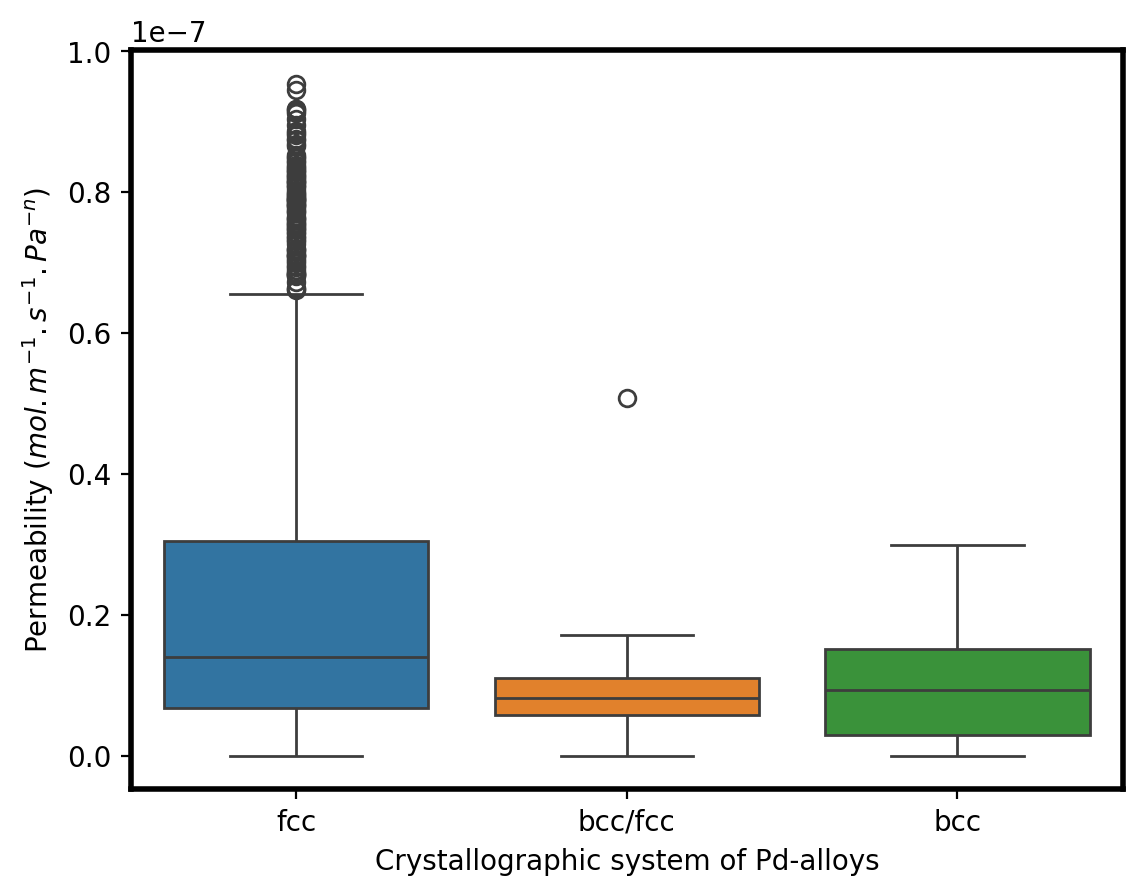

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the range of Permeability
plt.rc('axes', linewidth=2)
fig, ax =plt.subplots()
sns.boxplot(dfc, y='Permeability', x='Bravais lattice', hue='Bravais lattice', ax=ax)
ax.set(xlabel='Crystallographic system of Pd-alloys', ylabel=r'Permeability ($mol.m^{-1}.s^{-1}.Pa^{-n}$)')
plt.show()
Figure_dir='/content/drive/MyDrive/PhD_Pd alloy prediction/Figures_Pd_Permeability_Prediction'
Figure_1_name ='Crystal_type_boxplot.png'
Figure_1_path = os.path.join(Figure_dir, Figure_1_name)
plt.savefig(Figure_1_path, dpi=600, bbox_inches='tight', transparent=None)

In [ ]:
%%time
# Define group classification based on IUPAC groupings
IUPAC_GROUPS = {
    'G3':  ['Sc', 'Y', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'],
    'G4':  ['Ti', 'Zr', 'Hf'],
    'G5':  ['V', 'Nb', 'Ta'],
    'G6':  ['Cr', 'Mo', 'W'],
    'G7':  ['Mn', 'Re'],
    'G8':  ['Fe', 'Ru', 'Os'],
    'G9':  ['Co', 'Rh', 'Ir'],
    'G10': ['Ni', 'Pd', 'Pt'],
    'G11': ['Cu', 'Ag', 'Au'],
    'G12': ['Zn', 'Cd', 'Hg'],
    'G13': ['B', 'Al', 'Ga', 'In'],
    'G14': ['Sn', 'Pb']
}

# Reverse-lookup dictionary: element --> group
ELEMENT_TO_GROUP = {
    element: group for group, elements in IUPAC_GROUPS.items() for element in elements
}

def chemical_group_assigner(formula: str) -> str:
    """
    Assigns a group classification string to a chemical formula based on the IUPAC Periodic Table.

    Parameters:
        formula (str): A chemical formula, e.g., 'Pd47.25Cu52.75' or 'PdCu'.

    Returns:
        str: A group string like 'G10-G11' for classification, 10 should come before 11 (ascending order).
    """
    # Extract element symbols using regex
    elements = re.findall(r'[A-Z][a-z]*', formula)
    unique_elements = sorted(set(elements))  # Unique and sorted elements

    group_labels = []
    for element in unique_elements:
        group = ELEMENT_TO_GROUP.get(element)
        if group:
            group_labels.append(group)
        else:
            group_labels.append('Unknown')  # Optional: or raise an error

    # Sort the groups by numeric part for consistent ordering: G3, G10, etc.
    group_labels_sorted = sorted(group_labels, key=lambda g: int(re.findall(r'\d+', g)[0]) if g != 'Unknown' else float('inf'))

    return '-'.join(group_labels_sorted)

CPU times: user 9 µs, sys: 2 µs, total: 11 µs
Wall time: 13.8 µs


In [ ]:
%%time
dfc['Chemical group']=dfc['Composition in mole percent'].apply(chemical_group_assigner)
col=dfc.pop('Chemical group')
dfc.insert(4, 'Chemical group', col)

CPU times: user 8.61 ms, sys: 0 ns, total: 8.61 ms
Wall time: 8.51 ms


In [ ]:
%%time
dfc.head()

CPU times: user 108 µs, sys: 0 ns, total: 108 µs
Wall time: 111 µs


,Composition in mole percent,Thickness,Lattice parameter,Bravais lattice,Chemical group,Temperature,Pressure difference,Permeability,Composition_matrix,B,Al,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Y,Zr,Nb,Mo,Ru,Rh,Pd,Ag,In,Sn,La,Ce,Pr,Sm,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Ta,W,Ir,Pt,Au,Pb
0,Pd,0.00025,3.887000e-10,fcc,G10,737.15,325.7194,9.240000e-09,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Pd,0.00070,3.890000e-10,fcc,G10,673.15,730.0685,1.320000e-08,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pd,0.00070,3.890000e-10,fcc,G10,673.15,632.4555,1.260000e-08,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Pd,0.00070,3.890000e-10,fcc,G10,673.15,516.7204,1.260000e-08,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Pd,0.00070,3.890000e-10,fcc,G10,623.15,816.7007,1.120000e-08,(Pd),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
%%time
# We incorporated chemistry
dfc['Chemical group'].value_counts()

CPU times: user 888 µs, sys: 0 ns, total: 888 µs
Wall time: 933 µs


,count
Chemical group,
G10-G11,782
G3-G10,463
G10,135
G10-G11-G11,127
G8-G10,83
G3-G10-G11,74
G10-G10-G11,74
G10-G11-G13,72
G10-G10,40


In [ ]:
%%time
# Some groups are underrepresented (rare) and we group them in 'Others' class.
# How: Every group with number of instances < 20 is sent to the 'Others' class
group_counts = dfc['Chemical group'].value_counts()
rare_groups = group_counts[group_counts < 20].index # Previously used 5
dfc['Stratify Group'] = dfc['Chemical group'].apply(lambda x: 'Others' if x in rare_groups else x)

CPU times: user 4.12 ms, sys: 0 ns, total: 4.12 ms
Wall time: 4.1 ms


In [ ]:
%%time
dfc['Stratify Group'].value_counts()

CPU times: user 812 µs, sys: 0 ns, total: 812 µs
Wall time: 816 µs


,count
Stratify Group,
G10-G11,782
G3-G10,463
G10,135
G10-G11-G11,127
Others,121
G8-G10,83
G3-G10-G11,74
G10-G10-G11,74
G10-G11-G13,72


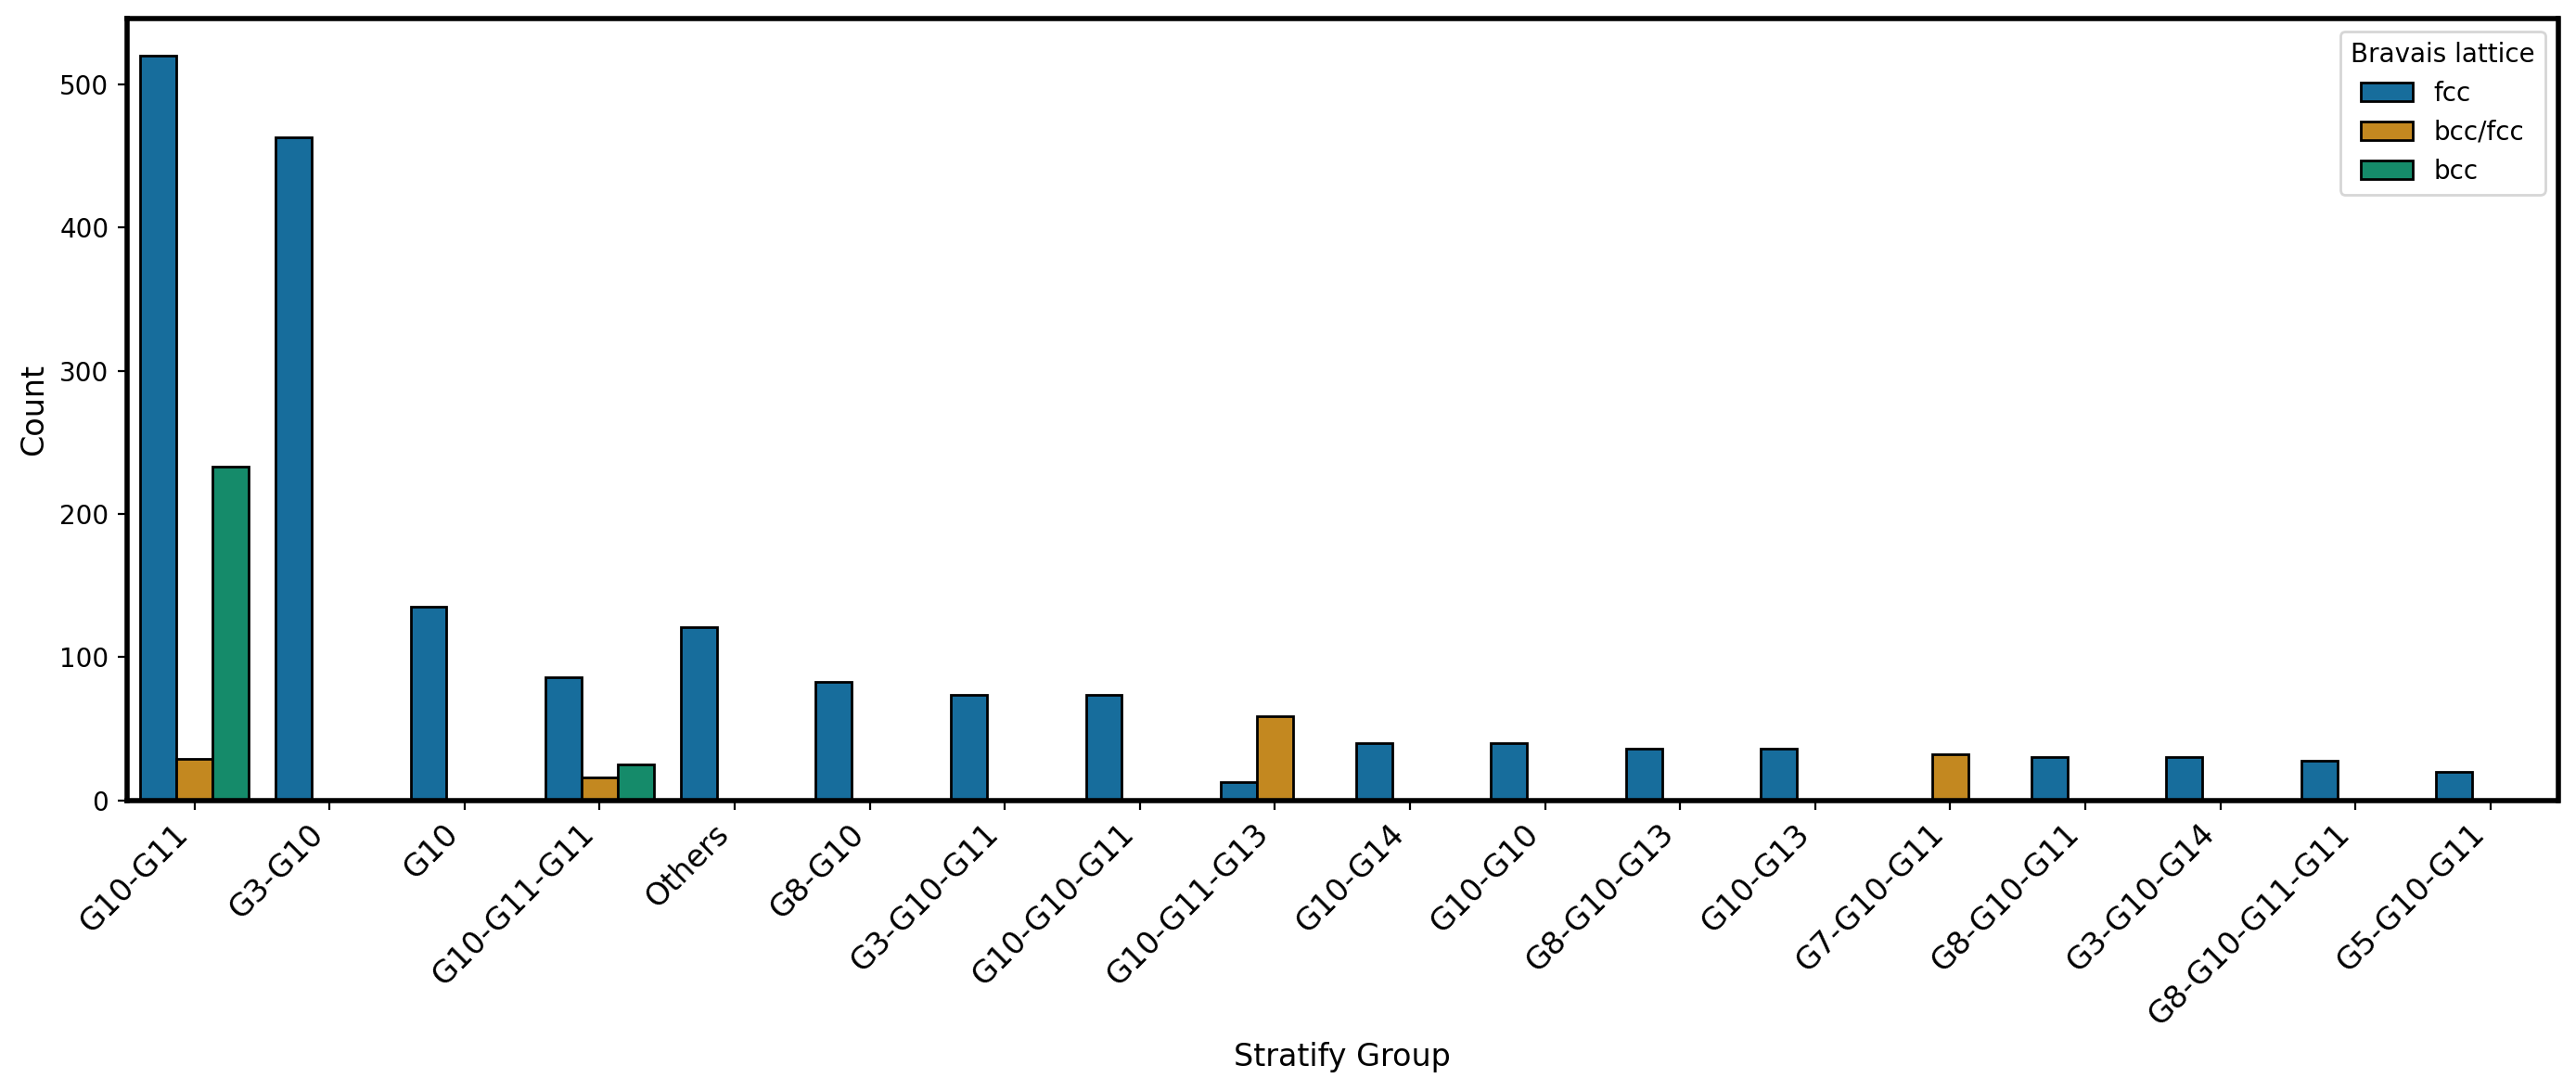

In [ ]:
# Distribution of chemical groups in the dataset
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
# sns.countplot(data=dfc, x='Chemical group', ax=ax, color='rebeccapurple')
sns.countplot(data=dfc, x='Stratify Group', hue='Bravais lattice', order=dfc['Stratify Group'].value_counts().index, hue_order=['fcc', 'bcc/fcc', 'bcc'],  palette='colorblind', edgecolor='black', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=90) # Get the current tick labels and set them with the desired formatting
ax.set_xlabel(xlabel='Stratify Group', fontsize=12)
ax.set_ylabel(ylabel='Count', fontsize=12, rotation=90)
plt.xticks(rotation=45, ha='right')

Figure_1_name = 'StratifyGroupdistribution_BravaisLattice.png'
figure_1_path = os.path.join(Figure_dir, Figure_1_name)
plt.savefig(figure_1_path, dpi=300)
plt.tight_layout()
plt.show()

In [ ]:
# Extracting the elements block present in the dataset
%%time
# Code modified after: https://github.com/NU-CUCIS/ElemNet/blob/master/elemnet/data_preprocess.ipynb
elements_present = set()
for i, row in dfc.iterrows():
    elements_present |= set(row['Composition_matrix'].as_dict().keys())
print (sorted(elements_present))
print('Number of element present:', len(elements_present))

['Ag', 'Al', 'Au', 'B', 'Ce', 'Co', 'Cr', 'Cu', 'Dy', 'Er', 'Fe', 'Ga', 'Gd', 'Ho', 'In', 'Ir', 'La', 'Lu', 'Mn', 'Mo', 'Nb', 'Ni', 'Pb', 'Pd', 'Pr', 'Pt', 'Rh', 'Ru', 'Sm', 'Sn', 'Ta', 'Tb', 'Ti', 'Tm', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr']
Number of element present: 40
CPU times: user 82.8 ms, sys: 1.96 ms, total: 84.7 ms
Wall time: 86.7 ms


In [ ]:
%%time
Element_list=[*elements_present]
Element_block = dfc[Element_list]
print(Element_block.shape)

(2223, 40)
CPU times: user 732 µs, sys: 0 ns, total: 732 µs
Wall time: 736 µs


In [ ]:
# We want to make sure pure palladium is always in the training dataset because it constitutes the base element (We will merge it later back on the train dataset)
Pd_subset = dfc[dfc['Composition in mole percent']=='Pd']
index_Pd = Pd_subset.index
df_no_Pd = dfc.drop(index=index_Pd, axis=0)
print('Palladium subset:', Pd_subset.shape)
print('dfc shape:', dfc.shape)
print('Dataframe without Pd:', df_no_Pd.shape)

Palladium subset: (135, 50)
dfc shape: (2223, 50)
Dataframe without Pd: (2088, 50)


In [ ]:
# # Determining the proportion of the datasets to have train_sizes=[0.7, 0.8, 0.9] (This method doesn't work because I grouped by unique alloys before stratification)
# Pd_subset_size=Pd_subset.shape[0]
# dfc_lenght=dfc.shape[0]
# percent=Pd_subset_size/dfc_lenght
# train_sizes=[0.7, 0.8, 0.9]
# for i in train_sizes:
#   print(f'Complement {i}:', round(i-percent, 2))

In [ ]:
# def stratified_group_split(dataframe, group_col, stratify_col, train_sizes=[0.75, 0.80, 0.90], random_state=42):
#     """
#     Generates multiple stratified train/test splits grouped by a unique column.

#     Parameters:
#     ----------
#     dataframe : pd.DataFrame
#         Full dataset.
#     group_col : str
#         Unique grouping column (e.g., alloy formula).
#     stratify_col : str
#         Column used for stratification (e.g., chemical group).
#     train_sizes : list of float
#         List of train set sizes (e.g., [0.64, 0.74, 0.84]).
#     random_state : int
#         Seed for reproducibility.

#     Returns:
#     -------
#     splits : dict
#         Dictionary where key = train size (rounded), value = (train_df, test_df).
#     """
#     splits = {}

#     # Validate input
#     if not isinstance(dataframe, pd.DataFrame):
#         raise ValueError("Input 'dataframe' must be a pandas DataFrame.")

#     group_df = dataframe.groupby(group_col).first().reset_index()
#     group_df['stratify_label'] = LabelEncoder().fit_transform(group_df[stratify_col])

#     for size in sorted(train_sizes):
#         test_size = 1 - size
#         n_splits = int(1 / test_size)

#         skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

#         train_groups, test_groups = None, None
#         for train_idx, test_idx in skf.split(group_df, group_df['stratify_label']):
#             train_groups = group_df.iloc[train_idx][group_col]
#             test_groups = group_df.iloc[test_idx][group_col]
#             break  # Use only the first split

#         if train_groups is None or test_groups is None:
#           raise RuntimeError("Stratified group split failed unexpectedly.")

#         df_train = dataframe[dataframe[group_col].isin(train_groups)].copy()
#         df_test = dataframe[dataframe[group_col].isin(test_groups)].copy()

#         splits[size] = (df_train, df_test)

#     return splits

In [ ]:
# # s=(K-1)/K
# # K=1/(s-1)
# # Which K-Fold should we use to have 0.75, 0.8 and 0.9 training samples.
# train_size =[0.75, 0.80, 0.90]
# for s in train_size:
#   K=1/(1-s)
#   print(f'Size {s}', K)

In [ ]:
%%time
# Function to split the data using StratifiedGroupKfold.
def stratified_group_splitter(
    dataframe: pd.DataFrame,
    group_col: str,
    target_col: str,
    train_size: float,
    stratify_col: str = 'Stratify Group',
    random_state: int = 42
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Splits a dataset into train/test sets with:
    - Stratification by chemical group ('Stratify Group' column)
    - Grouping by alloy formula ('Composition in mole percent' column)
    - Fixed train size using first fold from StratifiedGroupKFold
    - Inclusion of pure Pd in training set (Always)

    Parameters:
    ----------
    dataframe : pd.DataFrame
        Full dataset including features and target.
    group_col : str
        Column containing alloy formula.
    target_col : str
        Name of the target variable (used only for indexing).
    train_size : float
        Desired training fraction (e.g., 0.8 -> 80% train).
    stratify_col : str
        Column used for stratification (e.g., 'Stratify Group').
    random_state : int
        Random seed for reproducibility.

    Returns:
    -------
    df_train : pd.DataFrame
        Training set (with Pd rows included).
    df_test : pd.DataFrame
        Test set.
    """

    # Validate column names
    for col in [group_col, target_col, stratify_col]:
        if col not in dataframe.columns:
            raise ValueError(f"Column '{col}' not found in the dataframe.")

    # Count total samples and isolate pure Pd
    N_total = len(dataframe)
    pure_pd_frame = dataframe[dataframe[group_col] == 'Pd']
    N_pd = len(pure_pd_frame)

    # Remove Pd rows before splitting
    df = dataframe[dataframe[group_col] != 'Pd']
    N_remainder = len(df)

    # Compute adjusted train size (excluding Pd)
    target_train_size = train_size * N_total
    adjusted_train_size_without_pd = target_train_size - N_pd

    if adjusted_train_size_without_pd <= 0:
        raise ValueError("Too many Pd rows - adjusted train size is non-positive.")

    relative_train_fraction = adjusted_train_size_without_pd / N_remainder
    test_size = 1 - relative_train_fraction
    n_splits = round(1 / test_size)

    if n_splits < 2:
        raise ValueError("Adjusted number of splits too small. Choose a smaller train_size.")

    # Prepare split inputs
    X = df.drop(columns=[target_col])
    stratify_labels = df[stratify_col]
    groups = df[group_col]

    # Perform stratified group split to get the first folds for train/test set
    sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    train_idx, test_idx = next(sgkf.split(X, stratify_labels, groups=groups))

    # Build train/test DataFrames
    df_train = df.iloc[train_idx].copy()
    df_test = df.iloc[test_idx].copy()

    # Add Pd back to training set
    df_train = pd.concat([pure_pd_frame, df_train], ignore_index=True)

    return df_train, df_test

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 9.06 µs


In [ ]:
%%time
# Applying the function
group_col = 'Composition in mole percent'
stratify_col = 'Stratify Group'
dataframe = dfc

dfc_train_70, dfc_test_70 = stratified_group_splitter(dataframe=dfc, group_col='Composition in mole percent', target_col='Permeability', train_size=0.80, stratify_col='Stratify Group', random_state= 42) # This is 80/20

dfc_train_80, dfc_test_80 = stratified_group_splitter(dataframe=dfc, group_col='Composition in mole percent', target_col='Permeability', train_size=0.85, stratify_col='Stratify Group', random_state= 42) # This is 85/15

dfc_train_90, dfc_test_90 = stratified_group_splitter(dataframe=dfc, group_col='Composition in mole percent', target_col='Permeability', train_size=0.90, stratify_col='Stratify Group', random_state= 42) # This is 95/5

lt = [(dfc_train_70, dfc_test_70), (dfc_train_80, dfc_test_80), (dfc_train_90, dfc_test_90)]

CPU times: user 336 ms, sys: 0 ns, total: 336 ms
Wall time: 337 ms


In [ ]:
# # Generate Train, test splits of various sizes
# %%time
# #%%
# dataframe=df_no_Pd
# group_col='Composition in mole percent'
# stratify_col='Stratify Group'
# train_sizes=[0.75, 0.80, 0.90]
# random_state=42
# splits=stratified_group_split(dataframe=df_no_Pd, group_col=group_col, stratify_col=stratify_col, train_sizes=train_sizes, random_state=random_state)
# dfc_train_no_Pd_70, dfc_test_70 = splits[0.75]
# dfc_train_no_Pd_80, dfc_test_80 = splits[0.80]
# dfc_train_no_Pd_90, dfc_test_90 = splits[0.90]
# # %%
# dfc_train_70=pd.concat([dfc_train_no_Pd_70,Pd_subset], axis=0)
# dfc_train_80=pd.concat([dfc_train_no_Pd_80,Pd_subset], axis=0)
# dfc_train_90=pd.concat([dfc_train_no_Pd_90,Pd_subset], axis=0)
# lt=[(dfc_train_70, dfc_test_70), (dfc_train_80, dfc_test_80), (dfc_train_90, dfc_test_90)]

In [ ]:
%%time
# We can test if both train/test datasets are disjoint in terms of alloy formula.
col='Composition in mole percent'
for dataset in lt:
  assert set(dataset[0][col]).isdisjoint(set(dataset[1][col])), "Overlap found!"

CPU times: user 732 µs, sys: 0 ns, total: 732 µs
Wall time: 736 µs


In [ ]:
%%time
# The length of each dataset
dfc_lenght=dfc.shape[0]
for dataset in lt:
  print(f'Train size: {round((dataset[0].shape[0]/dfc_lenght)*100)}%') # Access the first element of the shape tuple (number of rows)

Train size: 80%
Train size: 85%
Train size: 94%
CPU times: user 0 ns, sys: 238 µs, total: 238 µs
Wall time: 229 µs


In [ ]:
%%time
print('Train set')
print(dfc_train_90['Stratify Group'].value_counts(normalize=True)*100)
print(len(dfc_train_90['Composition in mole percent'].unique()))
print('train size:', dfc_train_90.shape)
print('')

print('Test set')
print(dfc_test_90['Stratify Group'].value_counts(normalize=True)*100)
print(len(dfc_test_90['Composition in mole percent'].unique()))
print('test size:', dfc_test_90.shape)

Train set
Stratify Group
G10-G11           34.751434
G3-G10            22.131931
G10                6.453155
G10-G11-G11        5.879541
Others             4.971319
G3-G10-G11         3.537285
G10-G10-G11        3.441683
G8-G10             3.202677
G10-G11-G13        2.437859
G10-G14            1.912046
G10-G10            1.864245
G8-G10-G13         1.720841
G10-G13            1.720841
G7-G10-G11         1.529637
G8-G10-G11         1.434034
G8-G10-G11-G11     1.338432
G3-G10-G14         1.195029
G5-G10-G11         0.478011
Name: proportion, dtype: float64
299
train size: (2092, 50)

Test set
Stratify Group
G10-G11        41.984733
G10-G11-G13    16.030534
Others         12.977099
G8-G10         12.213740
G5-G10-G11      7.633588
G3-G10-G14      3.816794
G10-G11-G11     3.053435
G10-G10-G11     1.526718
G10-G10         0.763359
Name: proportion, dtype: float64
29
test size: (131, 50)
CPU times: user 3.18 ms, sys: 17 µs, total: 3.2 ms
Wall time: 3.08 ms


In [ ]:
# train_strat_groups = set(train_df['Stratify Group'])
# test_strat_groups = set(test_df['Stratify Group'])

# unseen = test_strat_groups - train_strat_groups
# print("Unseen groups in test:", unseen)

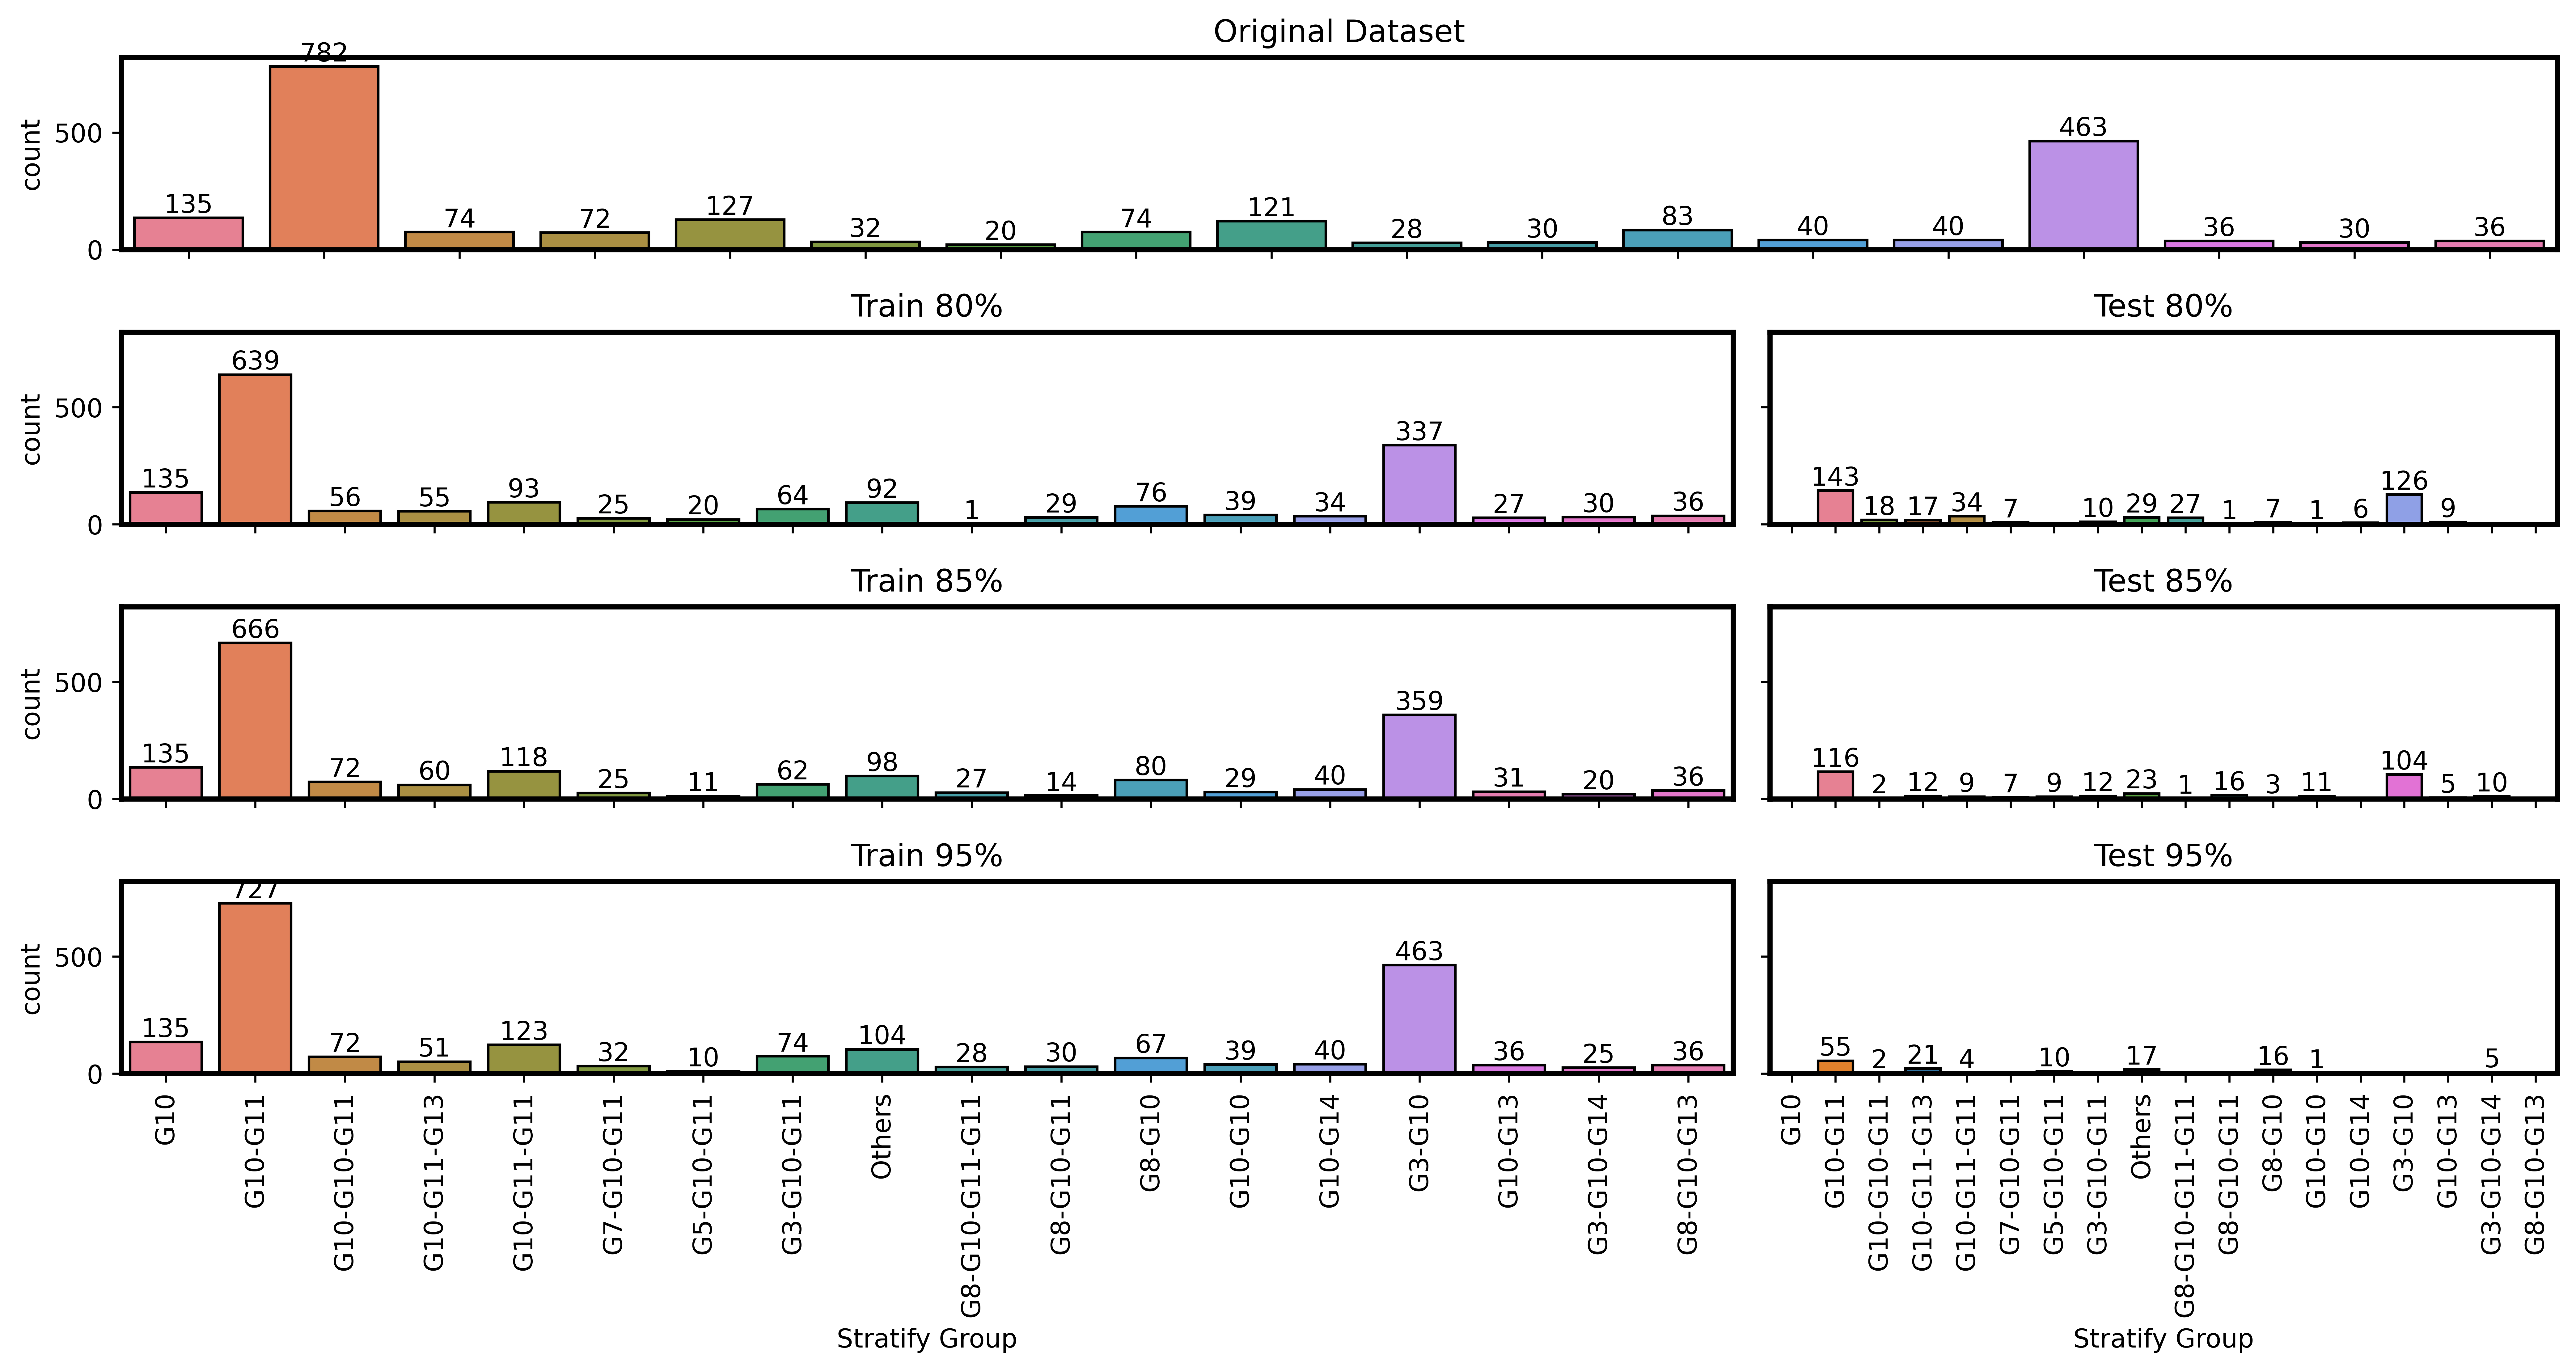

CPU times: user 3.78 s, sys: 124 ms, total: 3.91 s
Wall time: 4.13 s


In [ ]:
# Comparison the distribution in the datasets
# Example dataset names (replace with your real DataFrames)
%%time
datasets = {
    'Original': dfc,
    'Train 70%': dfc_train_70,
    'Test 70%': dfc_test_70,
    'Train 80%': dfc_train_80,
    'Test 80%': dfc_test_80,
    'Train 90%': dfc_train_90,
    'Test 90%': dfc_test_90
}

# Plot layout
layout = [
    ["A", "A", "A"],
    ["C", "C", "D"],
    ["E", "E", "F"],
    ["G", "G", "H"]
]

fig, axes = plt.subplot_mosaic(layout, sharex=True, sharey=True, figsize=(14, 7.5), dpi=300)

# Plotting
sns.countplot(data=datasets['Original'], x='Stratify Group', ax=axes['A'], hue='Stratify Group', edgecolor='black')
axes['A'].set_title('Original Dataset')
for container in axes['A'].containers:
    axes['A'].bar_label(container, fmt='%d', fontsize=10, label_type='edge')

sns.countplot(data=datasets['Train 70%'], x='Stratify Group', ax=axes['C'], hue='Stratify Group', edgecolor='black')
axes['C'].set_title('Train 80%')
for container in axes['C'].containers:
    axes['C'].bar_label(container, fmt='%d', fontsize=10, label_type='edge')

sns.countplot(data=datasets['Test 70%'], x='Stratify Group', ax=axes['D'], hue='Stratify Group', edgecolor='black')
axes['D'].set_title('Test 80%')
for container in axes['D'].containers:
    axes['D'].bar_label(container, fmt='%d', fontsize=10, label_type='edge')

sns.countplot(data=datasets['Train 80%'], x='Stratify Group', ax=axes['E'], hue='Stratify Group', edgecolor='black')
axes['E'].set_title('Train 85%')
for container in axes['E'].containers:
    axes['E'].bar_label(container, fmt='%d', fontsize=10, label_type='edge')

sns.countplot(data=datasets['Test 80%'], x='Stratify Group', ax=axes['F'], hue='Stratify Group', edgecolor='black')
axes['F'].set_title('Test 85%')
for container in axes['F'].containers:
    axes['F'].bar_label(container, fmt='%d', fontsize=10, label_type='edge')

sns.countplot(data=datasets['Train 90%'], x='Stratify Group', ax=axes['G'], hue='Stratify Group', edgecolor='black')
axes['G'].set_title('Train 95%')
for container in axes['G'].containers:
    axes['G'].bar_label(container, fmt='%d', fontsize=10, label_type='edge')

sns.countplot(data=datasets['Test 90%'], x='Stratify Group', ax=axes['H'], hue='Stratify Group', edgecolor='black')
axes['H'].set_title('Test 95%')
for container in axes['H'].containers:
    axes['H'].bar_label(container, fmt='%d', fontsize=10, label_type='edge')

for ax in axes.values():
    ax.tick_params(axis='x', labelrotation=90)

Figure_2_name = 'Data_splits_illustration.png'
figure_2_path = os.path.join(Figure_dir, Figure_2_name)
plt.savefig(figure_2_path, dpi=300)
plt.tight_layout()
plt.show()
# order=dfc['Stratify Group'].value_counts().index, hue_order=['fcc', 'bcc/fcc', 'bcc'],

In [ ]:
# Saving the datasets
%%time
PATH_train_70='/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/df_train_70.pkl'  #80/20 (Actual)
PATH_test_70='/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/df_test_70.pkl'

PATH_train_80='/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/df_train_80.pkl'  #85/15 (Actual)
PATH_test_80='/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/df_test_80.pkl'

PATH_train_90='/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/df_train_90.pkl'  #95/5  (Actual)
PATH_test_90='/content/drive/MyDrive/PhD_Pd alloy prediction/Resut_Data_cleaning/df_test_90.pkl'

#%%
dfc_train_70.to_pickle(PATH_train_70)
dfc_test_70.to_pickle(PATH_test_70)

dfc_train_80.to_pickle(PATH_train_80)
dfc_test_80.to_pickle(PATH_test_80)

dfc_train_90.to_pickle(PATH_train_90)
dfc_test_90.to_pickle(PATH_test_90)

CPU times: user 24.7 ms, sys: 1.95 ms, total: 26.6 ms
Wall time: 1.64 s


In [ ]:
dfc_test_90.head()

,Composition in mole percent,Thickness,Lattice parameter,Bravais lattice,Chemical group,Temperature,Pressure difference,Permeability,Composition_matrix,B,Al,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Y,Zr,Nb,Mo,Ru,Rh,Pd,Ag,In,Sn,La,Ce,Pr,Sm,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Ta,W,Ir,Pt,Au,Pb,Stratify Group
168,Pd40.21Cu57.86Al1.93,0.000025,2.915000e-10,bcc/fcc,G10-G11-G13,873.15,130.3881,6.500000e-09,"(Pd, Cu, Al)",0.0,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5786,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G10-G11-G13
205,Pd44.5Cu55.0Al0.5,0.000025,2.957000e-10,bcc/fcc,G10-G11-G13,873.15,130.3881,1.080000e-08,"(Pd, Cu, Al)",0.0,0.0050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G10-G11-G13
206,Pd44.5Cu55.0Al0.5,0.000025,2.957000e-10,bcc/fcc,G10-G11-G13,772.99,130.3881,9.490000e-09,"(Pd, Cu, Al)",0.0,0.0050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G10-G11-G13
207,Pd44.5Cu55.0Al0.5,0.000025,2.957000e-10,bcc/fcc,G10-G11-G13,622.82,130.3881,4.990000e-09,"(Pd, Cu, Al)",0.0,0.0050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G10-G11-G13
208,Pd44.5Cu55.0Al0.5,0.000025,2.957000e-10,bcc/fcc,G10-G11-G13,722.28,130.3881,7.160000e-09,"(Pd, Cu, Al)",0.0,0.0050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G10-G11-G13
